# 분석 outline
- 분석 목적 설명

- 주요 분석 질문 정리:

    교통사고가 가장 많이 발생하는 시기(월)는?

    음주운전 수준과 주야 시간대 간의 상관관계는?

    법규 위반 유형 중 가장 큰 비중을 차지하는 항목은?

## 데이터 출처

## 변수 종류
1. 변주형 변수 (Categorical Variables)
    가해자법규위반 (ex: 신호위반, 안전운전의무 불이행 등)

    가해자음주정도 (ex: 0.03~0.049%, 0.05%~0.079%, 측정불응 등)

    주야 (주간 / 야간)

    발생월 (1월 ~ 12월)

2. 수치형 변수 (Numeric Variables)
    사고건수

    사망자수

    중상자수

    경상자수

    부상신고자수



In [4]:
import pandas as pd

In [10]:
# 데이터 불러오기 
df_acc = pd.read_csv("./dataset/한국도로교통공단_월별 주야별 교통사고 통계_20231231.csv", encoding='cp949')
df_acc.head()

,발생월,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,주,8682,98,2209,9440,759
1,1,야,5798,92,1539,6349,530
2,2,주,8056,95,2149,8710,710
3,2,야,5228,86,1419,5553,500
4,3,주,10393,109,2600,11132,880


In [11]:
df_alc = pd.read_csv("./dataset/한국도로교통공단_가해운전자 음주정도별 주야별 교통사고 통계_20231231.csv", encoding='cp949')
df_alc.head()

,가해자음주정도,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,0.03~0.049%,주,326,5,91,426,18
1,0.03~0.049%,야,434,5,131,479,40
2,0.05%~0.079%,주,630,7,183,806,39
3,0.05%~0.079%,야,1341,28,376,1558,107
4,0.08%~0.149%,주,1408,12,342,1866,93


In [16]:
df_illegal = pd.read_csv("./dataset/한국도로교통공단_가해운전자 법규위반별 주야별 교통사고 통계_20231231.csv", encoding='cp949')
df_illegal.head()

,가해자법규위반,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,교차로 통행방법 위반,주,7699,25,1777,8901,769
1,교차로 통행방법 위반,야,3361,2,772,3923,351
2,기타,주,10871,111,3271,11461,1157
3,기타,야,5210,146,1548,5228,629
4,보행자 보호의무 위반,주,4483,73,1909,2588,132


In [18]:
# 주야 통합 사고건수 집계
acc_monthly_total = df_acc.groupby('발생월')[['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']].sum().reset_index()

acc_monthly_total

,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,14480,190,3748,15789,1289
1,2,13284,181,3568,14263,1210
2,3,16000,187,4049,17062,1347
3,4,16336,182,4406,17537,1606
4,5,17552,203,4708,18851,1781
5,6,16716,202,4482,17690,1705
6,7,16578,205,4309,17717,1687
7,8,17212,246,4622,18539,1752
8,9,17860,239,4840,18955,1856
9,10,17333,265,5000,17992,1661


In [20]:
# 주야 통합 가해자법규위반 사고 집계
illegal_monthly_total = df_illegal.groupby('가해자법규위반')[['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']].sum().reset_index()

illegal_monthly_total

,가해자법규위반,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,교차로 통행방법 위반,11060,27,2549,12824,1120
1,기타,16081,257,4819,16689,1786
2,보행자 보호의무 위반,7227,98,2982,4326,265
3,신호위반,23444,199,8276,25932,1583
4,안전거리 미확보,22231,47,3749,29158,2590
5,안전운전 의무 불이행,110868,1754,27484,114076,11404
6,중앙선 침범,7385,169,3130,8564,493


In [22]:
# 주야 통합 가해자음주측정도 집계
alc_monthly_total = df_alc.groupby('가해자음주정도')[['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']].sum().reset_index()

alc_monthly_total

,가해자음주정도,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,0.03~0.049%,760,10,222,905,58
1,0.05%~0.079%,1971,35,559,2364,146
2,0.08%~0.149%,5462,49,1398,6895,394
3,0.15%~0.199%,3160,35,781,4000,205
4,0.20%~0.249%,1038,22,282,1285,82
5,0.25%~0.299%,236,5,50,312,16
6,0.30%~0.349%,45,1,9,59,3
7,0.35%이상,22,1,6,35,1
8,측정불응,348,1,73,459,29


In [23]:
# 그래프 그리기 
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


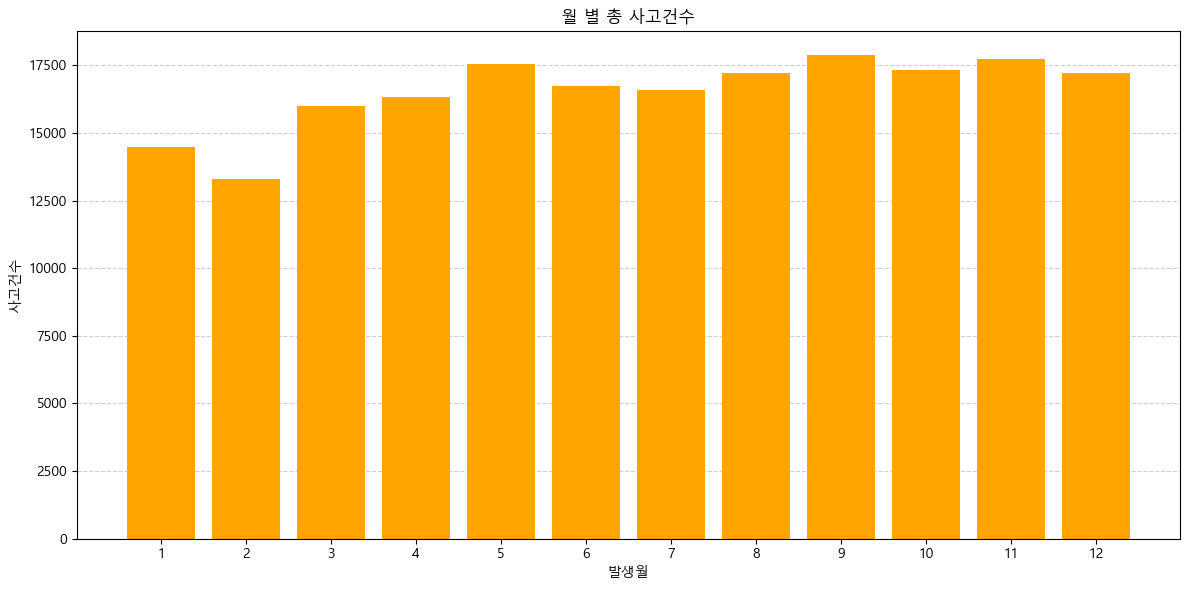

In [28]:
# 교통사고가 가장 많이 발생하는 시기(월)는?
# 시각화
plt.figure(figsize=(12, 6))
plt.bar(acc_monthly_total['발생월'], acc_monthly_total['사고건수'], color='orange')
plt.xticks(acc_monthly_total['발생월'])
plt.title('월 별 총 사고건수')
plt.xlabel('발생월')
plt.ylabel('사고건수')

# 배경 그리드
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().set_axisbelow(True) 

plt.tight_layout()
plt.show()

-> 총 사고건수의 그래프를 보면 

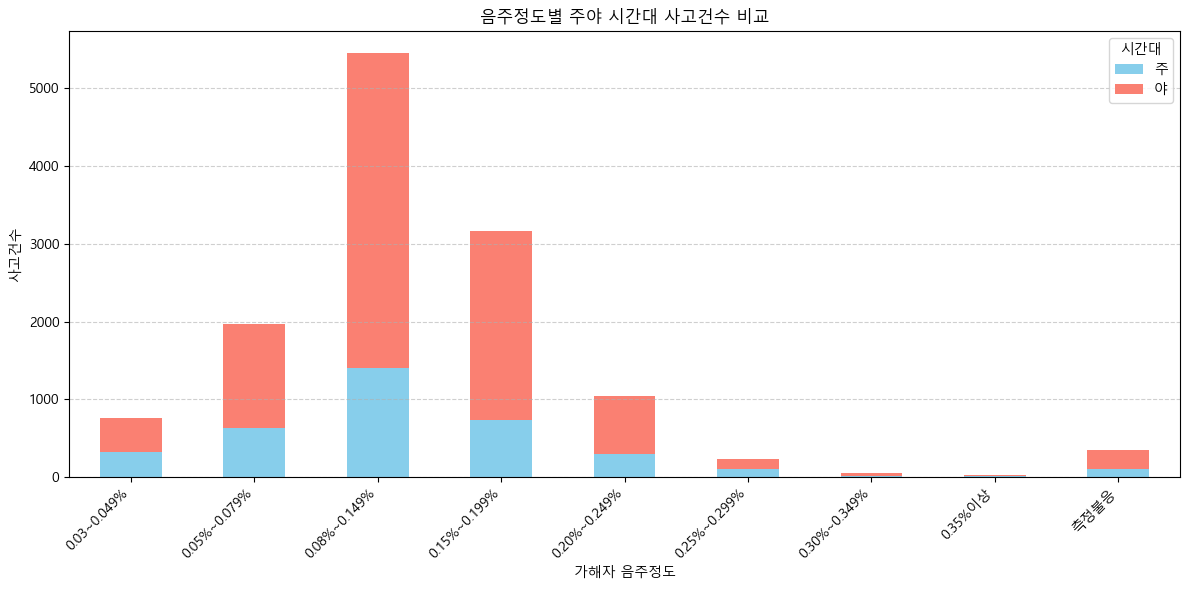

In [34]:
# 음주운전 수준과 주야 시간대 간의 상관관계는?

# 음주정도 + 주야 별 사고건수 총합 구하기 

df_alc_grouped = df_alc.groupby(['가해자음주정도', '주야'])['사고건수'].sum().reset_index()

pivot_df = df_alc_grouped.pivot(index='가해자음주정도', columns='주야', values='사고건수').fillna(0)

# 비율 계산 추가
pivot_df['주간 비율(%)'] = (pivot_df['주'] / (pivot_df['주'] + pivot_df['야'])) * 100
pivot_df['야간 비율(%)'] = (pivot_df['야'] / (pivot_df['주'] + pivot_df['야'])) * 100

# 시각화: 주야별 stacked bar chart
pivot_df_plot = pivot_df[['주', '야']]

pivot_df_plot.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('음주정도별 주야 시간대 사고건수 비교')
plt.xlabel('가해자 음주정도')
plt.ylabel('사고건수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='시간대')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# 법규 위반 유형 중 가장 큰 비중을 차지하는 항목은? -> top 5 표시 
illegal_total = df_illegal.groupby('가해자법규위반')['사고건수'].sum().reset_index()

violation_total = violation_total.sort_values(by='사고건수', ascending=False).reset_index(drop=True)


,가해자법규위반,사고건수
0,교차로 통행방법 위반,11060
1,기타,16081
2,보행자 보호의무 위반,7227
3,신호위반,23444
4,안전거리 미확보,22231
5,안전운전 의무 불이행,110868
6,중앙선 침범,7385
